# Exploratory Data Analysis and Preparation

## Objective
The goal of this notebook is to explore the Telco Customer Churn dataset, understand key patterns, and prepare the data for model training. The insights gained here will inform the development of predictive models for customer churn.

## Dataset Description
- **Source**: [Telco Customer Churn Dataset on Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)
- **Features**:
  - Customer demographics, subscription information, and churn labels.

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np

import os
import joblib  # To save and load models

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

In [105]:
# Load the dataset
df = pd.read_csv("../data/Telco-Customer-Churn.csv")

# Display basic information about the dataset
df.info()
df.head()

# Load the dataset and inspect its structure.
# The dataset has 7,043 rows and 21 columns with no missing values.
# The rows show customer demographics, subscription details, and churn labels.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [106]:
# Check for missing values in the dataset
print("Missing values per column:\n", df.isnull().sum())

# Observation:
# The output confirms there are no missing values in any column.

Missing values per column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [107]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Observation;
# The dataset contains no duplicate rows, ensuring data integrity.

Number of duplicate rows: 0


In [108]:
# Drop the customerID column as it is not useful for modeling.
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric
if 'TotalCharges' in df.columns:
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [109]:
# Identify categorical columns and list their unique values.
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Print unique values for each categorical column
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f"Column '{col}': {unique_values}")

# Observations:
# Columns like gender, Contract, and InternetService have well-defined categories.
# Churn is the target variable with two classes: 'Yes' and 'No'.

Column 'gender': ['Female' 'Male']
Column 'Partner': ['Yes' 'No']
Column 'Dependents': ['No' 'Yes']
Column 'PhoneService': ['No' 'Yes']
Column 'MultipleLines': ['No phone service' 'No' 'Yes']
Column 'InternetService': ['DSL' 'Fiber optic' 'No']
Column 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Column 'OnlineBackup': ['Yes' 'No' 'No internet service']
Column 'DeviceProtection': ['No' 'Yes' 'No internet service']
Column 'TechSupport': ['No' 'Yes' 'No internet service']
Column 'StreamingTV': ['No' 'Yes' 'No internet service']
Column 'StreamingMovies': ['No' 'Yes' 'No internet service']
Column 'Contract': ['Month-to-month' 'One year' 'Two year']
Column 'PaperlessBilling': ['Yes' 'No']
Column 'PaymentMethod': ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Column 'Churn': ['No' 'Yes']


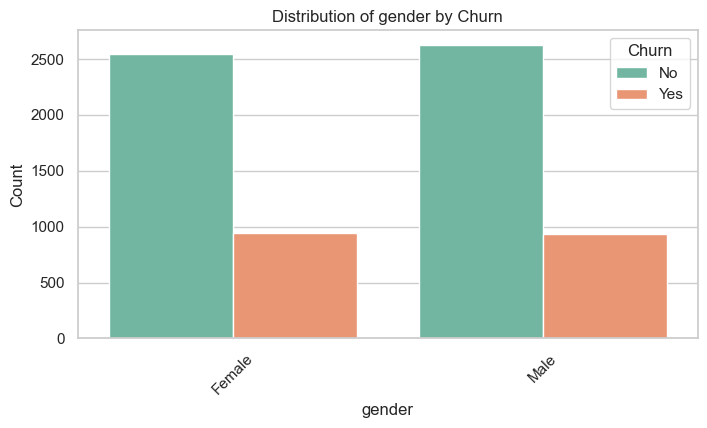

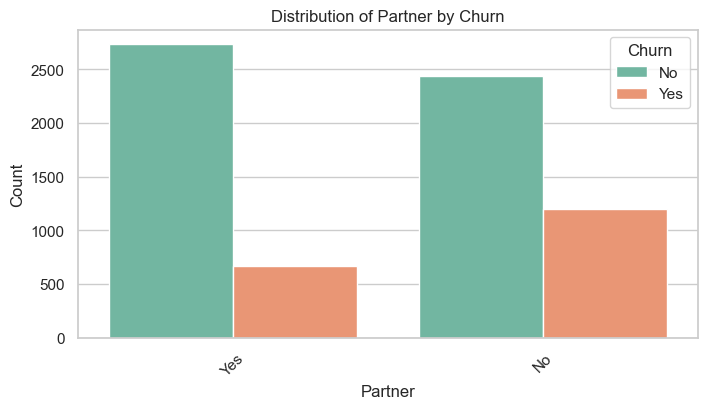

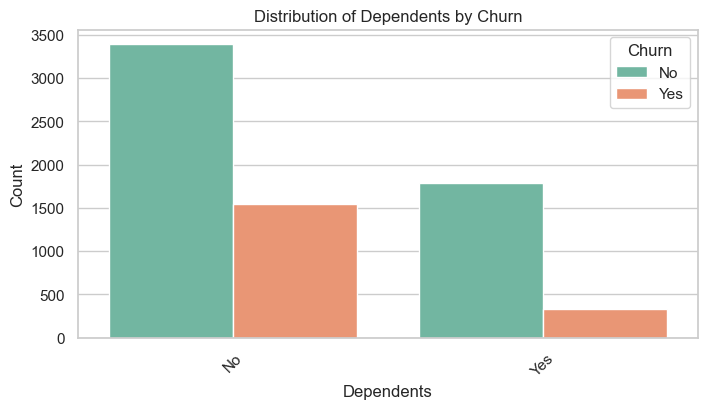

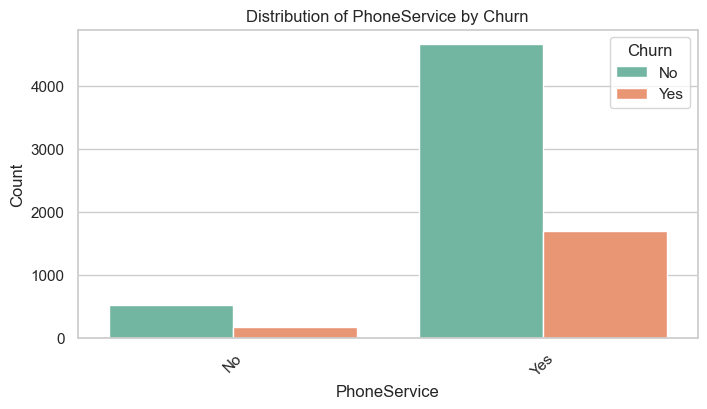

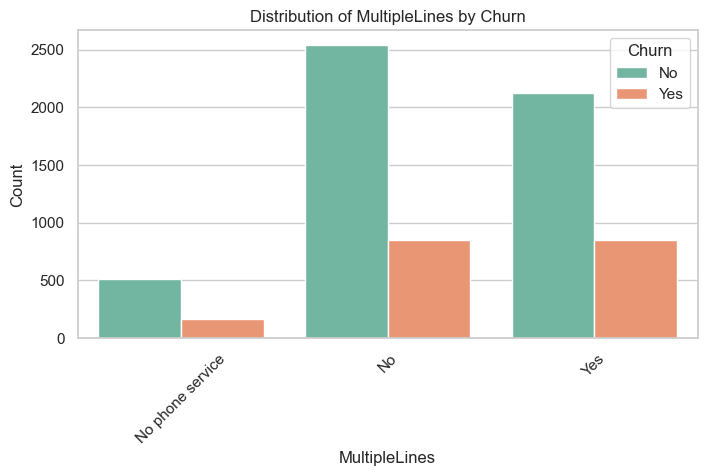

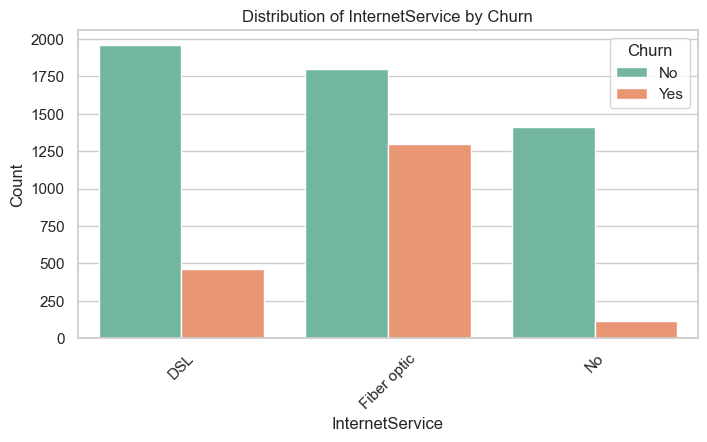

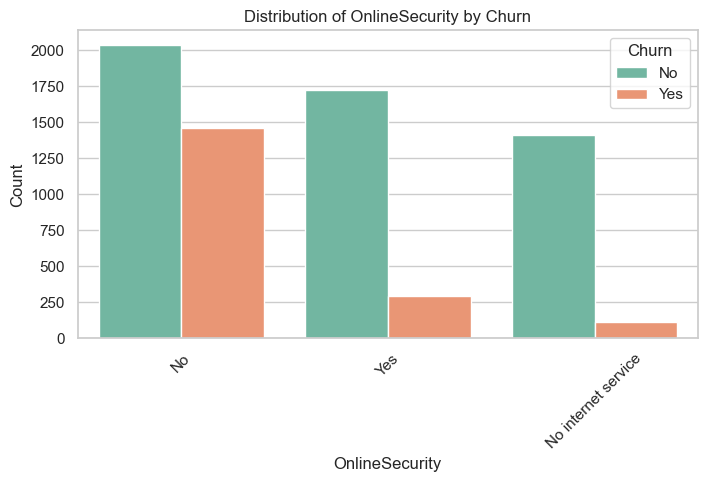

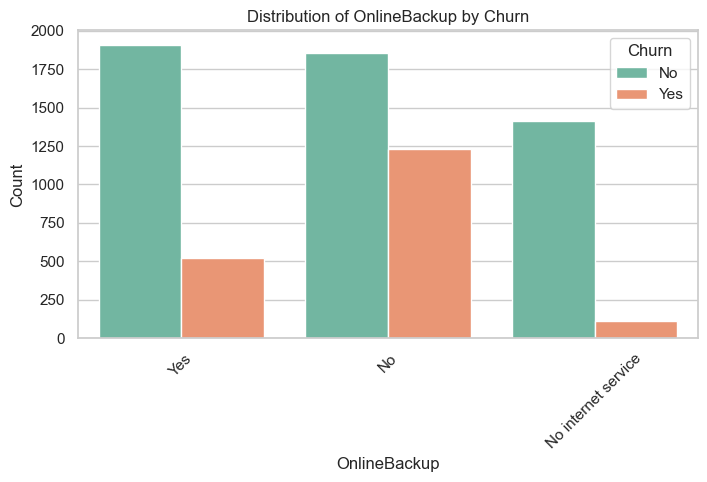

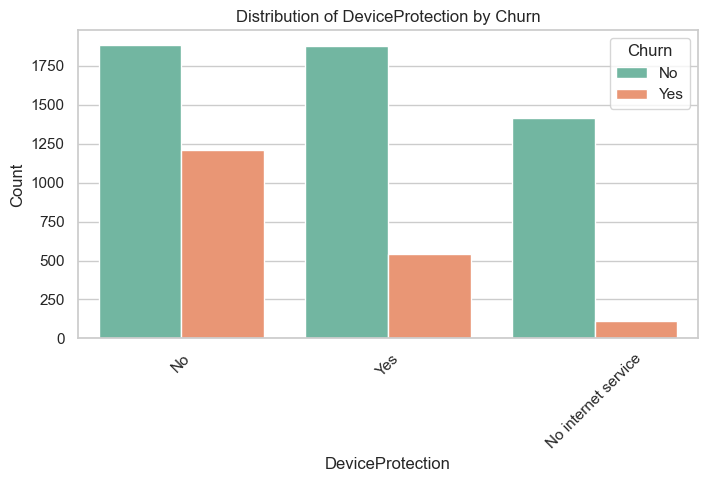

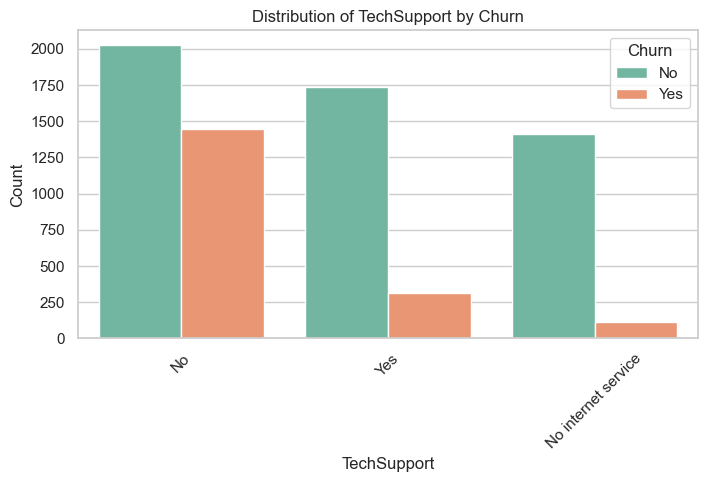

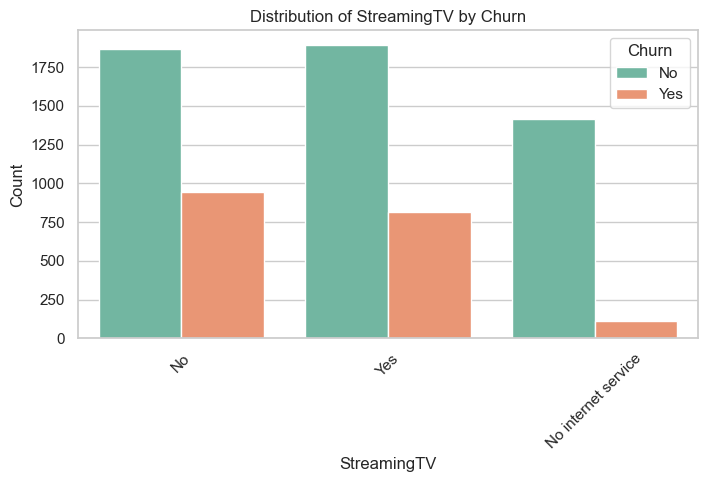

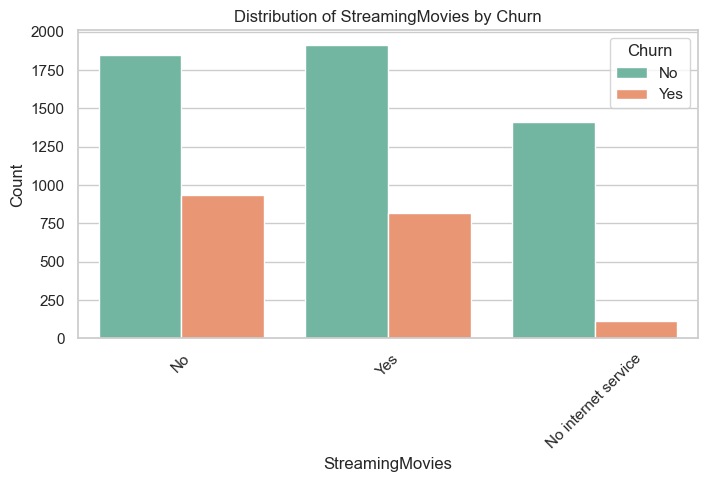

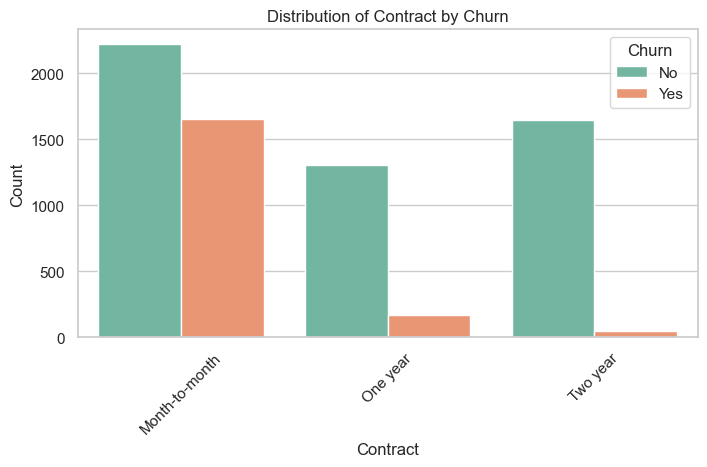

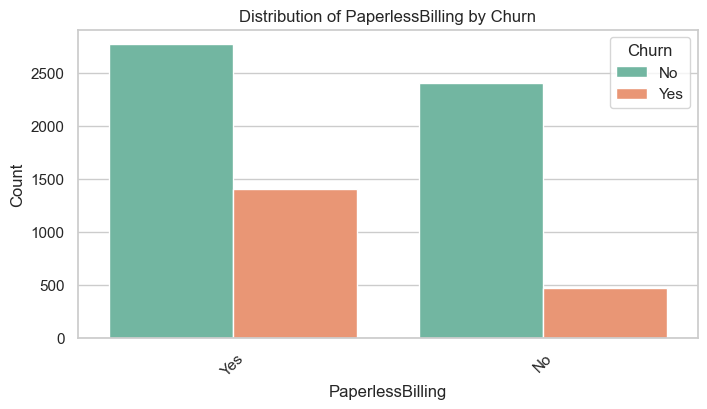

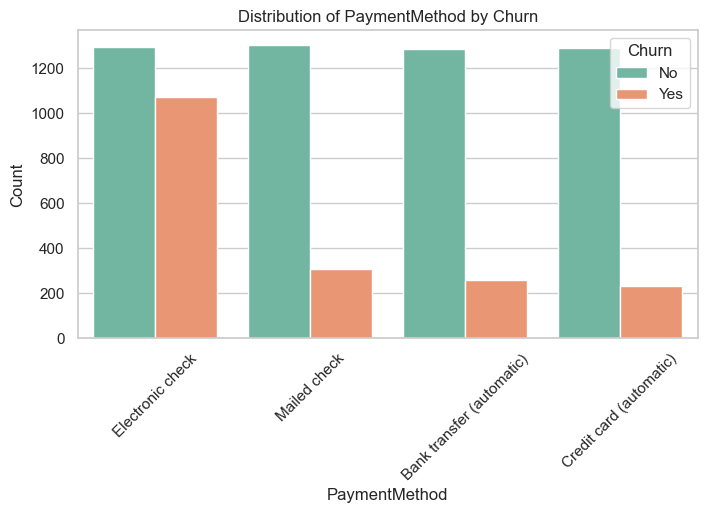

In [110]:
# Identify categorical columns based on data types
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Exclude the target variable 'Churn' from the list
categorical_columns = [col for col in categorical_columns if col != 'Churn']

# Generate count plots to explore the relationship between each categorical variable and Churn.
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue="Churn", data=df, palette="Set2")
    plt.title(f"Distribution of {col} by Churn")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Churn", labels=["No", "Yes"])
    plt.xticks(rotation=45)
    plt.show()

# Insights:
# - Customers with month-to-month contracts have higher churn rates.
# - Electronic check payment is associated with more churn.
# - Lack of services like OnlineSecurity and TechSupport correlates with higher churn.

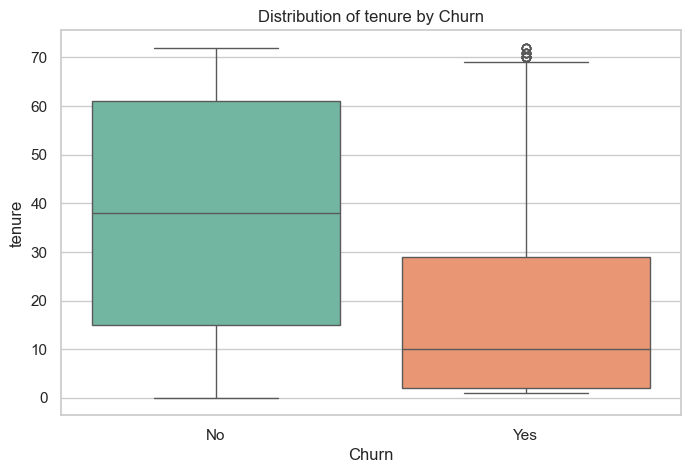

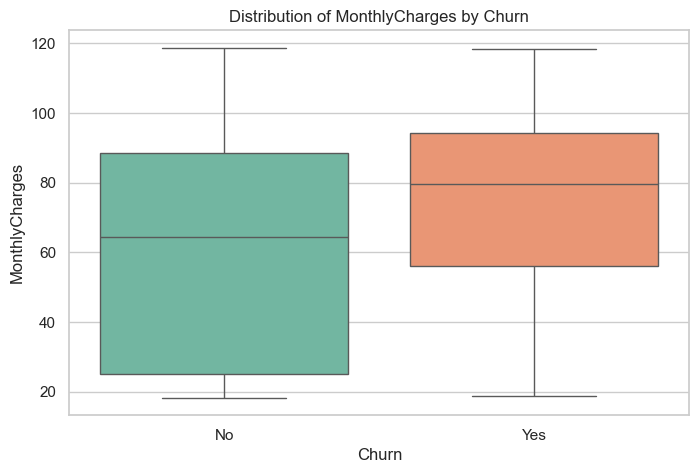

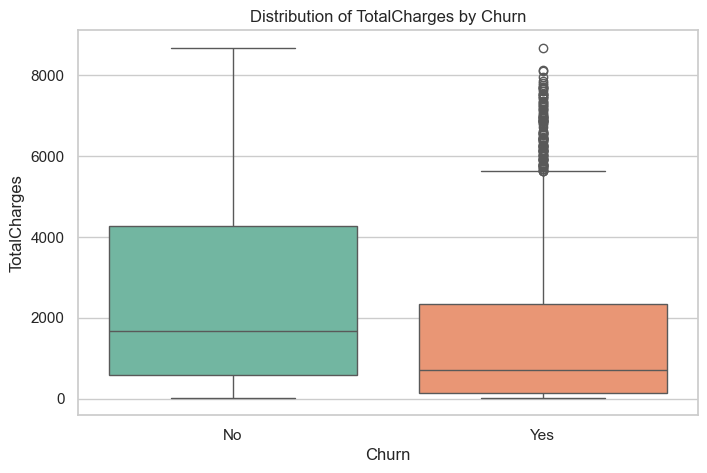

In [111]:
# Create boxplots to analyze the distribution of tenure, MonthlyCharges, and TotalCharges by Churn
numerical_columns = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="Churn", y=col, data=df, palette="Set2")
    plt.title(f"Distribution of {col} by Churn")
    plt.xlabel("Churn")
    plt.ylabel(col)
    plt.show()

# Observations:
# - Customers with lower tenure are more likely to churn.
# - Higher MonthlyCharges are associated with increased churn.
# - Lower TotalCharges (linked to short tenure) are associated with churn.

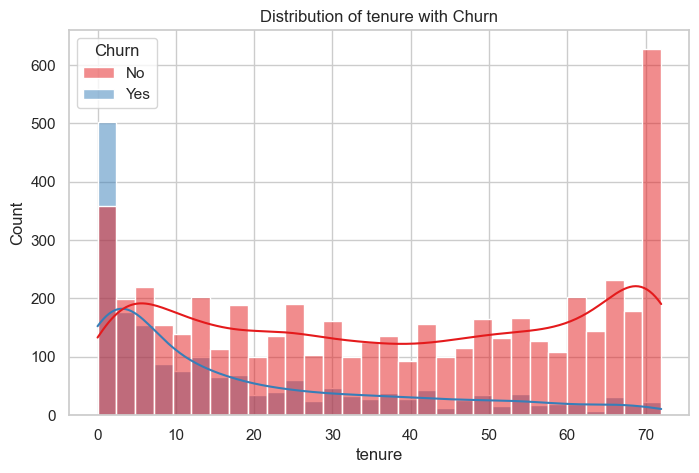

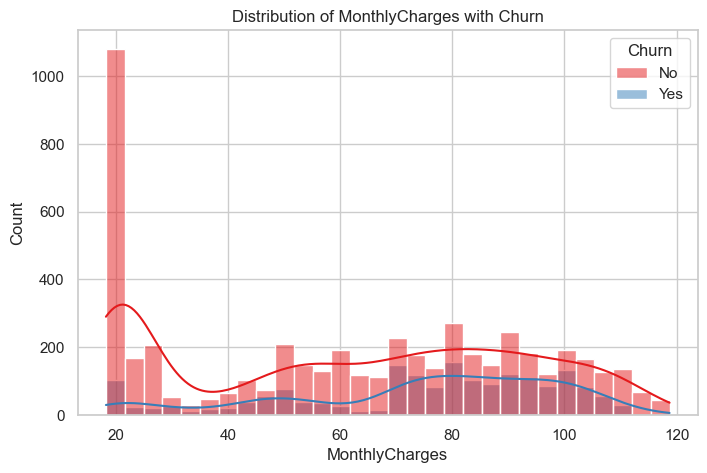

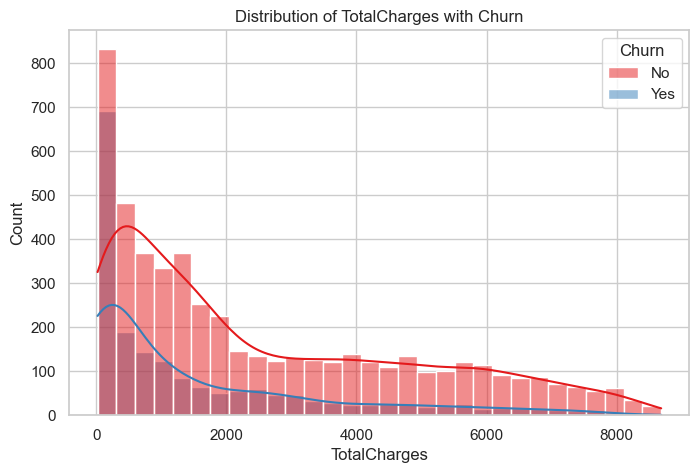

In [112]:
# Generate histograms to visualize the distribution of numerical variables for Churn = Yes and Churn = No
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue="Churn", kde=True, palette="Set1", bins=30)
    plt.title(f"Distribution of {col} with Churn")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Observations:
# - Tenure: Clear separation between low-tenure churners and non-churners.
# - MonthlyCharges: Overlap exists, but higher charges correlate with churn.
# - TotalCharges: Reflects tenure, showing lower cumulative charges for churners.

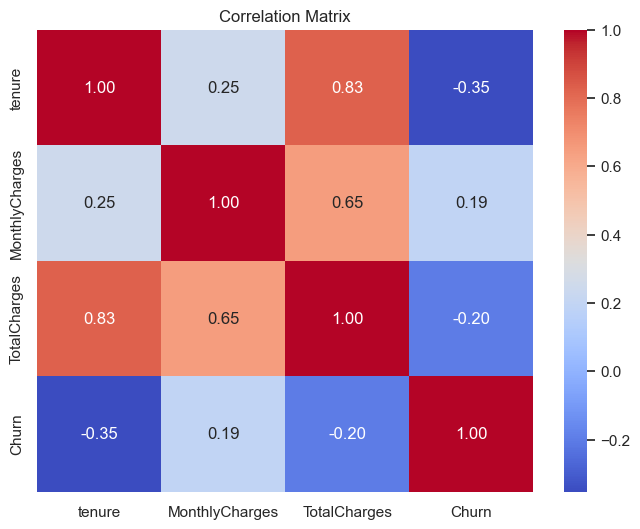

In [113]:
# Create a heatmap to analyze correlations between numerical variables and Churn
corr_matrix = df[numerical_columns + ["Churn"]].replace({"Churn": {"Yes": 1, "No": 0}}).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Observations:
# - Tenure has a strong negative correlation with Churn.
# - MonthlyCharges has a moderate positive correlation with Churn.
# - TotalCharges shows a weaker correlation due to its dependence on tenure and MonthlyCharges.

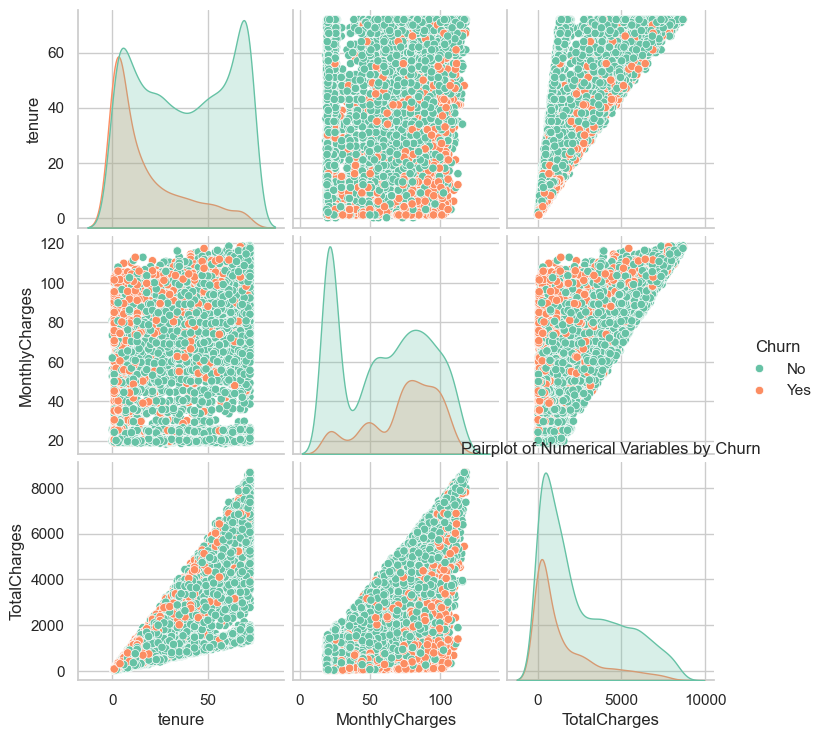

In [114]:
# The pairplot provides insights into how numerical variables like tenure, MonthlyCharges, and TotalCharges relate to churn
sns.pairplot(df, vars=["tenure", "MonthlyCharges", "TotalCharges"], hue="Churn", palette="Set2")
plt.title("Pairplot of Numerical Variables by Churn")
plt.show()

# Observations:
# - Tenure: Customers with shorter tenure are more likely to churn. The density for 'Yes' churn customers is high for low tenure values.
# - MonthlyCharges: Churn appears to be higher for customers with higher monthly charges.
# - TotalCharges: A linear relationship between tenure and TotalCharges is evident, but churn seems more frequent for customers with lower TotalCharges.

In [115]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['category', 'object']).columns

# Transform categorical variables into numerical format for machine learning
# Drop the first category to prevent multicollinearity
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(df[categorical_cols])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Drop the original categorical columns from the DataFrame
df.drop(columns=categorical_cols, inplace=True)

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

In [116]:
print(f"Shape of encoded DataFrame: {encoded_df.shape}")
print(f"Columns of encoded DataFrame: {list(encoded_df.columns)}")
df.head()

Shape of encoded DataFrame: (7043, 27)
Columns of encoded DataFrame: ['gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Churn_Yes']


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,34,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,108.15,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0,45,42.30,1840.75,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [117]:
# Rename Churn column for clarity
df.rename(columns={"Churn_Yes": "Churn"}, inplace=True)

In [118]:
# Check for null values
print(df.isnull().sum())

SeniorCitizen                             0
tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                           0
StreamingMovies_No internet serv

In [119]:
# drop missing values
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.isnull().sum())

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

In [120]:
# Scale numerical variables to ensure values are within a similar range
# MinMaxScaler scales features to [0, 1] range for interpretability
scaler = MinMaxScaler()
numerical_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [121]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Train set shape: (5625, 30), Test set shape: (1407, 30)


In [123]:
# Initialize the DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")  # Predicts the majority class
dummy_clf.fit(X_train, y_train)

# Make predictions
y_pred_dummy = dummy_clf.predict(X_test)
y_proba_dummy = dummy_clf.predict_proba(X_test)[:, 1]

# Evaluate the performance
print("Classification Report (Dummy Classifier):")
print(classification_report(y_test, y_pred_dummy, target_names=["Not Churn", "Churn"]))

# AUC-ROC score
auc_dummy = roc_auc_score(y_test, y_proba_dummy)
print(f"AUC-ROC Score (Dummy Classifier): {auc_dummy:.2f}")

# The DummyClassifier predicts the most frequent class (majority class) in the training data.
# This classifier serves as a baseline to compare the performance of more advanced models.
# The classification report indicates that the model is heavily biased toward the majority class ("Not Churn"),
# resulting in zero recall, precision, and F1-score for the minority class ("Churn").
# The AUC-ROC score of 0.50 suggests that the model has no discriminative power, equivalent to random guessing.

Classification Report (Dummy Classifier):
              precision    recall  f1-score   support

   Not Churn       0.73      1.00      0.85      1033
       Churn       0.00      0.00      0.00       374

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.73      0.62      1407

AUC-ROC Score (Dummy Classifier): 0.50


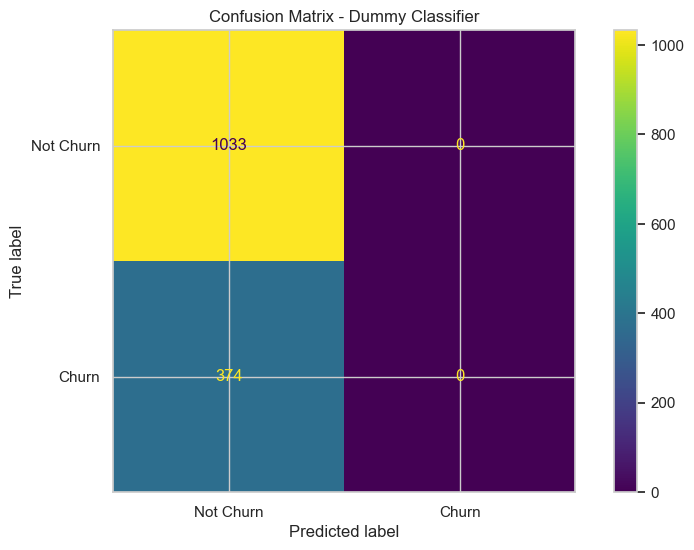

In [124]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(dummy_clf, X_test, y_test, display_labels=["Not Churn", "Churn"])
plt.title("Confusion Matrix - Dummy Classifier")
plt.show()

# The confusion matrix visualizes the performance of the DummyClassifier:
# - The classifier correctly predicts all instances as the majority class ("Not Churn").
# - All "Churn" instances are misclassified as "Not Churn" (false negatives), indicating no predictive capability for the minority class.

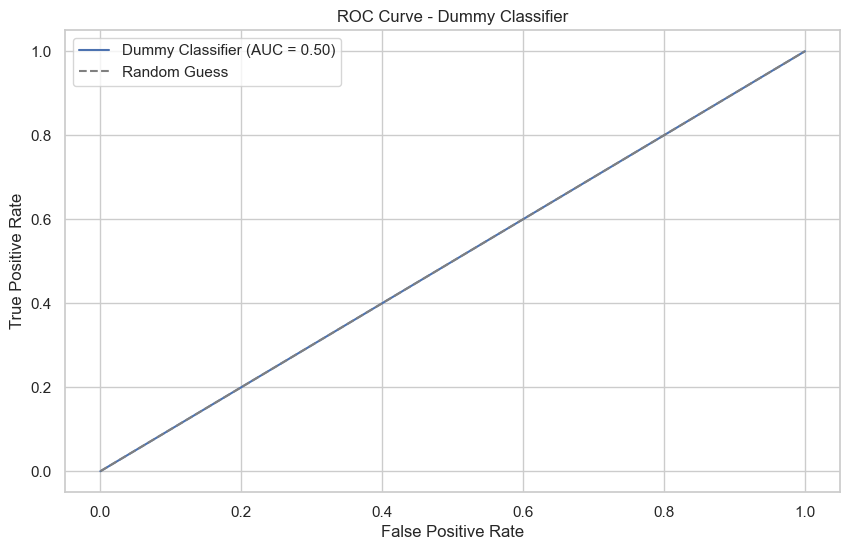

In [125]:
# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_dummy)
plt.plot(fpr, tpr, label=f"Dummy Classifier (AUC = {auc_dummy:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Dummy Classifier")
plt.legend()
plt.show()

# The ROC curve for the DummyClassifier lies on the diagonal, representing random guessing.
# The AUC of 0.50 confirms that the model does not differentiate between the two classes.
# This visualization highlights the need for more sophisticated models to improve classification performance.

In [126]:
# Initialize an empty list to store model scores
model_scores = []

# Define the models and their hyperparameters
models = {
    'Logistic Regression': (
        LogisticRegression(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10], 'model__penalty': ['l2']}
    ),
    'Random Forest': (
        RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100], 'model__max_depth': [None, 10]}
    ),
    'Support Vector Machine': (
        SVC(random_state=42, class_weight='balanced', probability=True),
        {'model__C': [0.1, 1, 10], 'model__gamma': ['scale', 'auto']}
    ),
    'K-Nearest Neighbors': (
        KNeighborsClassifier(),
        {'model__n_neighbors': [3, 5, 7], 'model__weights': ['uniform', 'distance']}
    ),
    'Decision Tree': (
        DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [None, 10], 'model__min_samples_split': [2, 5]}
    )
}

In [149]:
# The directory `../models` will be used to save trained models and their results.
# If the directory does not exist, it will be created.
model_dir = "../models"
os.makedirs(model_dir, exist_ok=True)

# This function saves a trained model pipeline and its results to disk.
# - `pipeline`: The trained model pipeline (e.g., preprocessing + model).
# - `results`: A dictionary containing model performance metrics and parameters.
# The model and its results are saved in `.joblib` and `.pkl` formats, respectively.
def save_model(model_name, pipeline, results):
    model_path = os.path.join(model_dir, f"{model_name}.joblib")
    results_path = os.path.join(model_dir, f"{model_name}_results.pkl")
    joblib.dump(pipeline, model_path)
    joblib.dump(results, results_path)

# This function loads a previously saved model and its results from disk.
# If the files exist, it returns the model pipeline and its associated metrics.
# If the files do not exist, it returns `None`.
def load_model(model_name):
    model_path = os.path.join(model_dir, f"{model_name}.joblib")
    results_path = os.path.join(model_dir, f"{model_name}_results.pkl")
    if os.path.exists(model_path) and os.path.exists(results_path):
        pipeline = joblib.load(model_path)
        results = joblib.load(results_path)
        return pipeline, results
    return None, None

# This function generates a heatmap of the confusion matrix for a given model.
# It shows the number of True Positives, True Negatives, False Positives, and False Negatives.
# The labels and values are annotated on the plot for easy interpretation.
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="viridis",  
        cbar=True,
        xticklabels=["0", "1"],
        yticklabels=["0", "1"], 
        ax=ax
    )
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

# This function generates the ROC-AUC curve for a given model.
# It visualizes the trade-off between the True Positive Rate (Sensitivity) and False Positive Rate.
# The Area Under the Curve (AUC) is also calculated and displayed in the legend.
def plot_roc_auc(y_true, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc_roc = roc_auc_score(y_true, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_roc:.2f})")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.show()


# This function prints the key performance metrics of a model:
# - Accuracy: Overall correctness of the predictions.
# - AUC-ROC: A measure of the model's ability to distinguish between classes.
# - Classification Report: Includes precision, recall, and F1-score for each class.
# - Best Parameters: The hyperparameters selected through GridSearchCV.
def print_metrics(accuracy, auc_roc, report, best_params, model_name):
    print(f"Model: {model_name}")
    if best_params:
        print(f"Best Parameters: {best_params}")
    print(f"Accuracy: {accuracy:.2f}")
    if auc_roc is not None:
        print(f"AUC-ROC: {auc_roc:.2f}")
    print("Classification Report:\n", report)
    print("-" * 50)

# This function trains, evaluates, and saves a specific model:
# - If the model already exists and `force_train` is False, it loads and displays stored results.
# - If the model does not exist, it trains using GridSearchCV for hyperparameter optimization.
# - Performance metrics are calculated, visualized, and saved for future use.
def run_model(model_name, force_train=False):
    pipeline, results = load_model(model_name)
    if pipeline and results and not force_train:
        print(f"Model {model_name} already exists. Displaying stored results...")

        y_pred = pipeline.predict(X_test)
        y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline.named_steps['model'], "predict_proba") else None
        plot_confusion_matrix(y_test, y_pred, model_name)
        if y_proba is not None:
            plot_roc_auc(y_test, y_proba, model_name)

        print_metrics(
            results['Accuracy'], 
            results['AUC-ROC'], 
            results['Classification Report'], 
            results.get('Best Parameters'),
            model_name
        )
        return

    if model_name not in models:
        print(f"Model {model_name} not defined in the models dictionary.")
        return

    model, param_grid = models[model_name]

    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', model)
    ])

    grid_search = GridSearchCV(pipeline, param_grid, cv=3)  # Cross-validation with 3 folds
    grid_search.fit(X_train, y_train)

    # Extract cross-validation results
    best_cv_score = grid_search.best_score_

    best_pipeline = grid_search.best_estimator_
    y_pred = best_pipeline.predict(X_test)
    y_proba = best_pipeline.predict_proba(X_test)[:, 1] if hasattr(best_pipeline.named_steps['model'], "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    report = classification_report(y_test, y_pred)

    plot_confusion_matrix(y_test, y_pred, model_name)
    if y_proba is not None:
        plot_roc_auc(y_test, y_proba, model_name)

    results = {
        'Model': model_name,
        'Accuracy': accuracy,
        'AUC-ROC': auc_roc,
        'Classification Report': report,
        'Best Parameters': grid_search.best_params_,
        'Best CV Score': best_cv_score  # Include best CV score in results
    }

    save_model(model_name, best_pipeline, results)
    print_metrics(accuracy, auc_roc, report, grid_search.best_params_, model_name)

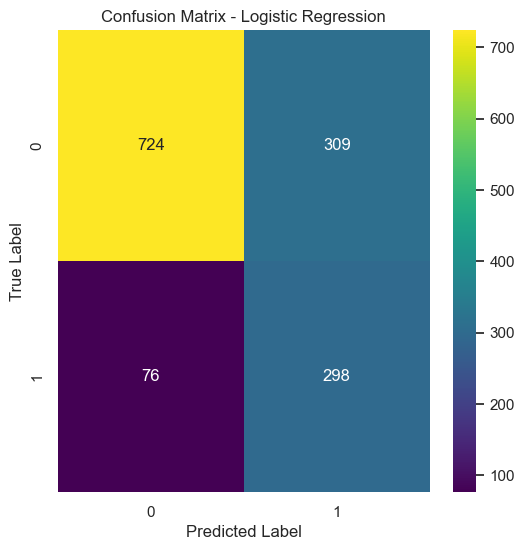

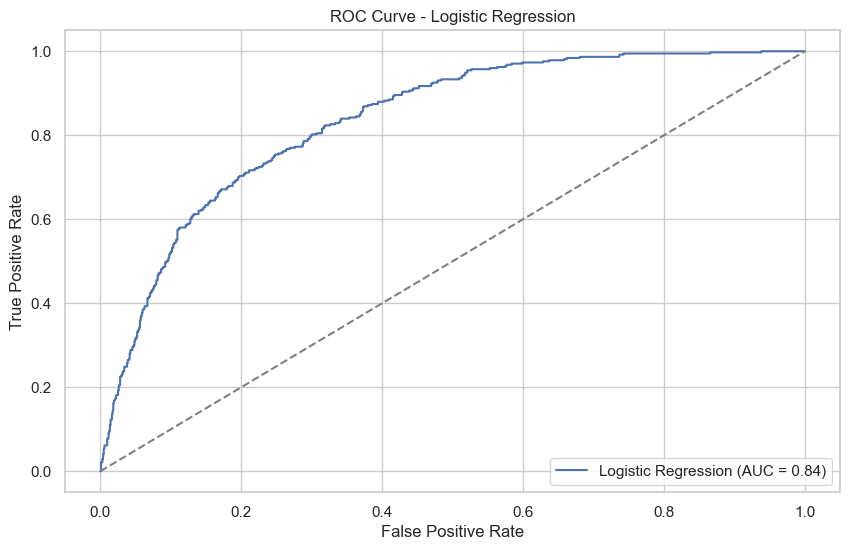

Model: Logistic Regression
Best Parameters: {'model__C': 10, 'model__penalty': 'l2'}
Accuracy: 0.73
AUC-ROC: 0.84
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.70      0.79      1033
         1.0       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407

--------------------------------------------------


In [150]:
run_model('Logistic Regression')

# Observations for Logistic Regression

# Observations from the Confusion Matrix:
# - True Negatives: 724 customers correctly classified as "Not Churn".
# - False Positives: 309 customers misclassified as "Churn" despite not churning.
# - False Negatives: 76 customers misclassified as "Not Churn" despite actually churning.
# - True Positives: 298 customers correctly classified as "Churn".
# - The confusion matrix indicates that the model performs better at identifying "Not Churn" customers than "Churn" customers.

# Observations from the ROC Curve:
# - The AUC-ROC score is 0.84, indicating good overall performance in distinguishing between "Churn" and "Not Churn".
# - The ROC curve is close to the top-left corner, which suggests that the model has a good balance between true positive rate and false positive rate.

# Observations from the Classification Report:
# - For Class '0.0' (Not Churn):
#   - Precision: 0.91, indicating that most predicted "Not Churn" customers were correctly classified.
#   - Recall: 0.70, suggesting that the model missed some "Not Churn" instances.
#   - F1-Score: 0.79, reflecting the balance between precision and recall for this class.
# - For Class '1.0' (Churn):
#   - Precision: 0.49, showing that the model struggles with predicting "Churn" correctly without including false positives.
#   - Recall: 0.80, indicating that the model captured most actual "Churn" instances but at the cost of precision.
#   - F1-Score: 0.61, highlighting room for improvement in "Churn" predictions.
# - Overall Accuracy: 0.73, meaning that 73% of all predictions were correct.
# - Macro Average F1-Score: 0.70, showing balanced performance across both classes.
# - Weighted Average F1-Score: 0.74, accounting for class imbalance in the dataset.

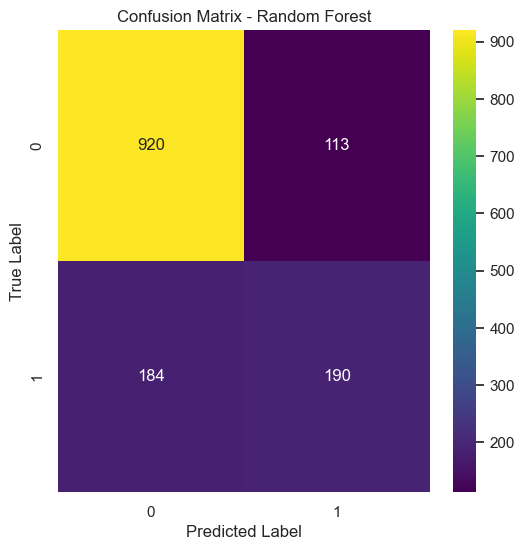

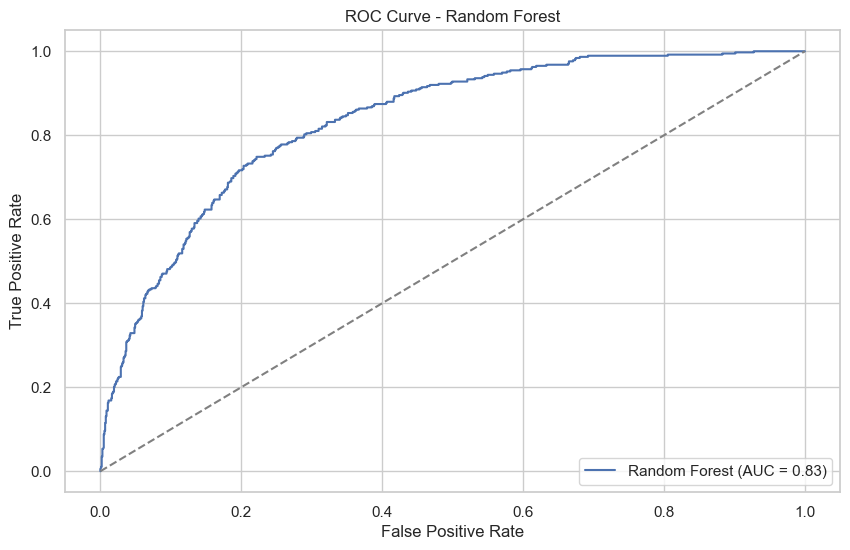

Model: Random Forest
Best Parameters: {'model__max_depth': 10, 'model__n_estimators': 100}
Accuracy: 0.79
AUC-ROC: 0.83
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1033
         1.0       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

--------------------------------------------------


In [151]:
run_model('Random Forest')

# Observations for Random Forest

# Confusion Matrix:
# - True Negatives (920): The model correctly predicted 920 customers who would not churn.
# - False Positives (113): The model incorrectly predicted 113 customers as churners who did not churn.
# - False Negatives (184): The model missed predicting churn for 184 customers who actually churned.
# - True Positives (190): The model correctly identified 190 customers who churned.

# ROC Curve:
# - The AUC-ROC value is 0.83, indicating a strong ability to distinguish between churn and non-churn cases.
# - The ROC curve is well above the diagonal line, confirming the model's predictive capability.

# Metrics from the Classification Report:
# - Precision for '1' (Churn) is 0.63: Of all customers predicted to churn, 63% actually churned.
# - Recall for '1' (Churn) is 0.51: The model identified 51% of the actual churners.
# - F1-Score for '1' (Churn) is 0.56: The harmonic mean of precision and recall for churn cases.
# - Macro Average:
#   - Recall is 0.70, highlighting the balance between the two classes.
# - Weighted Average:
#   - Accuracy is 0.79, showing overall performance weighted by class support.
# - The model tends to favor the majority class ('0') but performs reasonably well in detecting churners.

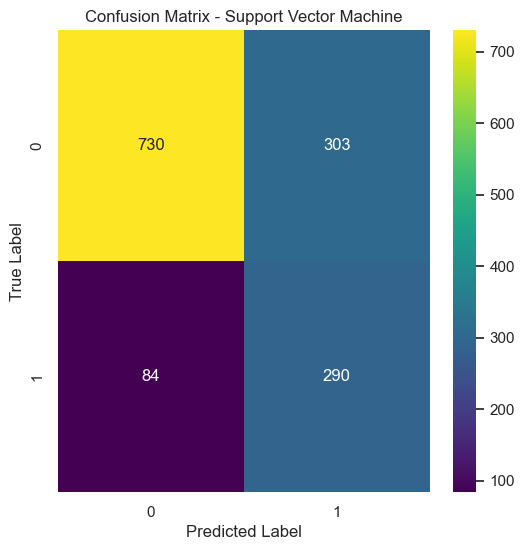

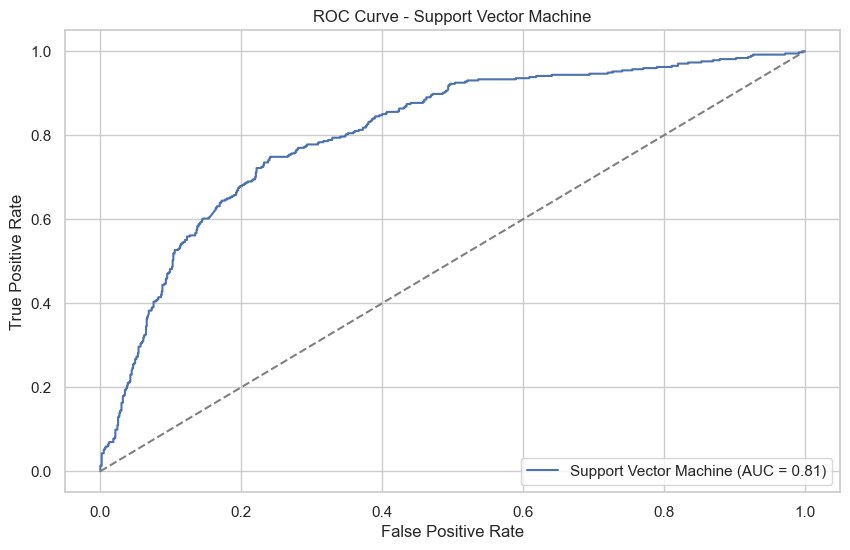

Model: Support Vector Machine
Best Parameters: {'model__C': 1, 'model__gamma': 'scale'}
Accuracy: 0.72
AUC-ROC: 0.81
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.71      0.79      1033
         1.0       0.49      0.78      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.79      0.72      0.74      1407

--------------------------------------------------


In [152]:
run_model('Support Vector Machine')

# Observations for Support Vector Machine

# Confusion Matrix:
# - The SVM model demonstrates a strong ability to identify True Negatives (730 instances), meaning customers who will not churn are correctly predicted.
# - True Positives are 290, indicating that some churners are correctly identified, but this is slightly lower than the True Negatives.
# - False Negatives (84) show that the model misses a small number of actual churners.
# - False Positives (303) highlight that a significant number of customers are incorrectly classified as churners.

# ROC Curve:
# - The AUC-ROC score is 0.81, showcasing the model's good performance in distinguishing between churn and non-churn cases.
# - The curve indicates the model balances True Positive Rate and False Positive Rate reasonably well.

# Classification Metrics:
# - Precision for class 1 (Churn): 0.49, meaning 49% of the customers predicted as churners are actual churners.
# - Recall for class 1 (Churn): 0.78, suggesting that 78% of actual churners are correctly identified.
# - F1-score for class 1: 0.60, reflecting a balance between precision and recall for churn detection.
# - For class 0 (Not Churn), the model achieves high precision (0.90) and recall (0.71), resulting in a strong F1-score of 0.79.

# Overall:
# - The model is strong in detecting non-churners, as evidenced by the high True Negatives and corresponding metrics for class 0.
# - For churn prediction (class 1), the model exhibits moderate precision but better recall, making it suitable for identifying churners where recall is critical.
# - This trade-off might work well in a business context prioritizing customer retention strategies, but further tuning or balancing could improve precision.

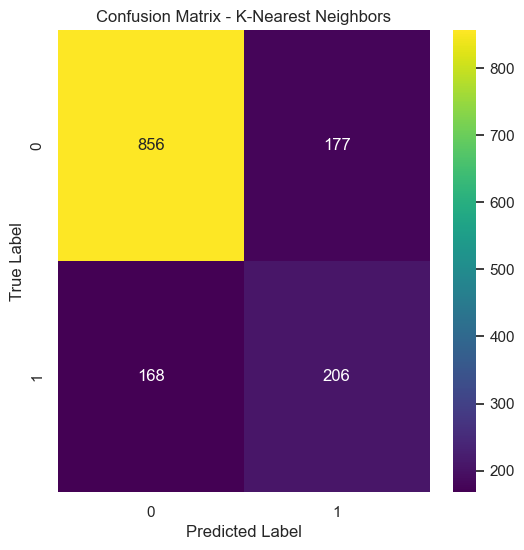

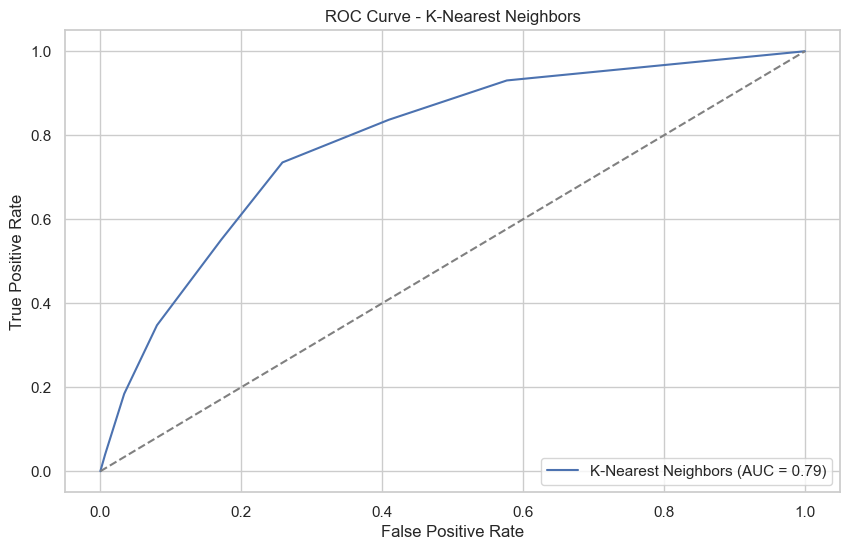

Model: K-Nearest Neighbors
Best Parameters: {'model__n_neighbors': 7, 'model__weights': 'uniform'}
Accuracy: 0.75
AUC-ROC: 0.79
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.83      0.83      1033
         1.0       0.54      0.55      0.54       374

    accuracy                           0.75      1407
   macro avg       0.69      0.69      0.69      1407
weighted avg       0.76      0.75      0.76      1407

--------------------------------------------------


In [153]:
run_model('K-Nearest Neighbors')

# Observations for K-Nearest Neighbors

# Confusion Matrix:
# - True Negatives (856): The model correctly identified 856 non-churn customers.
# - False Positives (177): 177 non-churn customers were incorrectly classified as churn.
# - False Negatives (168): 168 churn customers were missed and classified as non-churn.
# - True Positives (206): The model correctly identified 206 churn customers.

# ROC Curve:
# - The AUC-ROC score is 0.79, indicating a moderate ability to distinguish between churn and non-churn customers.
# - The curve demonstrates that the model is somewhat better than random guessing but could benefit from further optimization.

# Metrics Summary:
# - Accuracy: 75% of the predictions were correct, but this metric can be misleading due to the imbalance in the dataset.
# - Precision (Class 1 - Churn): 54%, indicating that of all predicted churn customers, only 54% were actual churners.
# - Recall (Class 1 - Churn): 55%, meaning the model identified 55% of actual churners correctly.
# - F1-Score (Class 1 - Churn): 54%, balancing precision and recall for churn class.
# - Macro Avg and Weighted Avg scores highlight the performance across both classes but should be interpreted with caution due to class imbalance.

# Recommendations:
# - The model struggles to identify churn customers effectively (low recall and precision for churn class).
# - Consider fine-tuning the hyperparameters further or trying advanced techniques like oversampling the churn class or feature engineering.
# - Evaluate the cost of false negatives (missed churners) in the business context and prioritize recall if necessary.

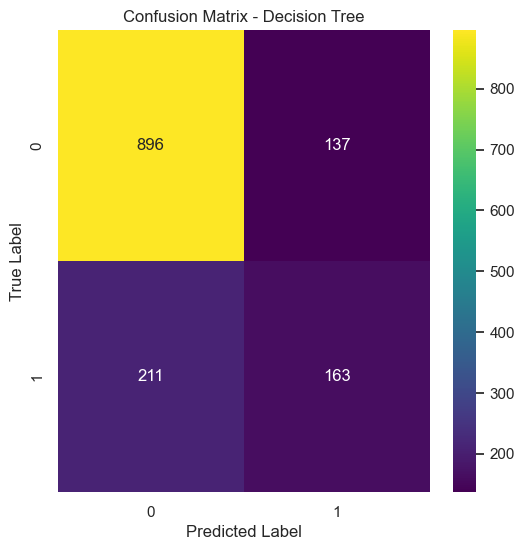

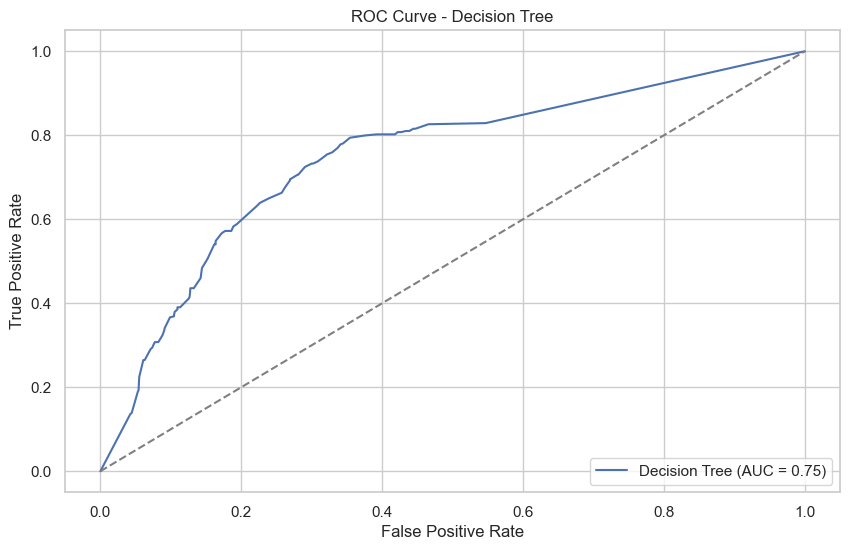

Model: Decision Tree
Best Parameters: {'model__max_depth': 10, 'model__min_samples_split': 5}
Accuracy: 0.75
AUC-ROC: 0.75
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.87      0.84      1033
         1.0       0.54      0.44      0.48       374

    accuracy                           0.75      1407
   macro avg       0.68      0.65      0.66      1407
weighted avg       0.74      0.75      0.74      1407

--------------------------------------------------


In [154]:
run_model('Decision Tree')

# Observations for Decision Tree

# Confusion Matrix:
# - True Negatives: The model correctly classified 896 samples as 'Not Churn'.
# - False Positives: The model incorrectly classified 137 samples as 'Churn' when they are 'Not Churn'.
# - False Negatives: The model incorrectly classified 211 samples as 'Not Churn' when they are 'Churn'.
# - True Positives: The model correctly classified 163 samples as 'Churn'.
# Interpretation: The model struggles with identifying true churners (high false negatives).

# ROC Curve:
# - AUC-ROC: 0.75 indicates that the Decision Tree has moderate discrimination power.
# - The curve suggests better performance for low false positive rates but flattens out afterward.

# Metrics from Classification Report:
# - Precision (0.0): 81% of the 'Not Churn' predictions were correct.
# - Precision (1.0): 54% of the 'Churn' predictions were correct, reflecting some room for improvement.
# - Recall (0.0): 87% of 'Not Churn' instances were identified correctly.
# - Recall (1.0): 44% of 'Churn' instances were identified correctly, indicating significant false negatives.
# - F1-Score (0.0): 0.84, indicating a balance between precision and recall for 'Not Churn'.
# - F1-Score (1.0): 0.48, highlighting the model's lower effectiveness in identifying churners.

# Overall Metrics:
# - Accuracy: 75%, showing the proportion of correct predictions out of total samples.
# - Macro Avg: Recall (0.65) reflects imbalanced performance across classes.
# - Weighted Avg: F1-score (0.75) is weighted based on class support and aligns with accuracy.

# Insights:
# - The Decision Tree performs reasonably well for the majority class ('Not Churn').
# - There is a need to address the high false negatives to improve recall for 'Churn'.
# - Fine-tuning or exploring ensemble techniques may enhance overall performance.

In [157]:
# Define the directory where models and results are saved
model_dir = "../models"

# Create a summary DataFrame for model results
results_summary = []

# Loop through saved results files
for file in os.listdir(model_dir):
    if file.endswith("_results.pkl"):  # Look for result files
        model_name = file.replace("_results.pkl", "")  # Extract the model name
        results_path = os.path.join(model_dir, file)
        
        # Load the results
        model_results = joblib.load(results_path)
        
        # Extract additional metrics from the classification report
        classification_report = model_results['Classification Report']
        report_lines = classification_report.split("\n")
        weighted_avg = report_lines[-2].split()
        macro_avg = report_lines[-3].split()

        # Append the results to the summary list
        results_summary.append({
            'Model': model_name,
            'Accuracy': model_results['Accuracy'],
            'AUC-ROC': model_results['AUC-ROC'],
            'Best CV Score': model_results.get('Best CV Score', None),  # Include Best CV Score
            'Precision (Weighted Avg)': float(weighted_avg[2]),
            'Recall (Weighted Avg)': float(weighted_avg[3]),
            'F1-Score (Weighted Avg)': float(weighted_avg[4]),
            'Precision (Macro Avg)': float(macro_avg[2]),
            'Recall (Macro Avg)': float(macro_avg[3]),
            'F1-Score (Macro Avg)': float(macro_avg[4])
        })

# Convert the summary list to a DataFrame
results_summary = pd.DataFrame(results_summary)

# Sort by AUC-ROC
results_summary = results_summary.sort_values(by='AUC-ROC', ascending=False)

# Display the results
print("Model Performance Summary:")
display(results_summary)

Model Performance Summary:


,Model,Accuracy,AUC-ROC,Best CV Score,Precision (Weighted Avg),Recall (Weighted Avg),F1-Score (Weighted Avg),Precision (Macro Avg),Recall (Macro Avg),F1-Score (Macro Avg)
4,Logistic Regression,0.726368,0.835603,0.752711,0.79,0.73,0.74,0.70,0.75,0.70
1,Random Forest,0.788913,0.834596,0.801422,0.78,0.79,0.78,0.73,0.70,0.71
0,Support Vector Machine,0.724947,0.807028,0.747378,0.79,0.72,0.74,0.69,0.74,0.70
2,K-Nearest Neighbors,0.754797,0.787486,0.771022,0.76,0.75,0.76,0.69,0.69,0.69
3,Decision Tree,0.752665,0.746739,0.756267,0.74,0.75,0.74,0.68,0.65,0.66


In [ ]:
# Observations from the Comparative Performance Table

# 1. Random Forest has the highest accuracy (0.79), indicating it performs best overall
#    in terms of correctly predicting both churners and non-churners.
# 2. Logistic Regression achieves the highest AUC-ROC (0.84), meaning it is best at distinguishing 
#    between churners and non-churners.
# 3. Random Forest also leads in F1-Score (Weighted Avg) with 0.78, balancing precision and recall effectively.
# 4. Logistic Regression and Random Forest maintain high precision (Weighted Avg) values of 0.79, 
#    showing they are robust in predicting true positives.
# 5. Macro Avg metrics show Logistic Regression has the highest recall (0.75), making it better at handling imbalanced data.
# 6. K-Nearest Neighbors and Decision Tree models perform moderately, with accuracies of 0.75,
#    but their AUC-ROC values (0.79 and 0.75, respectively) are weaker in distinguishing churners from non-churners.
# 7. Support Vector Machine (SVM) has the lowest accuracy (0.72) and AUC-ROC (0.81), indicating 
#    it struggles with this dataset, though its F1-Score (Weighted Avg) of 0.74 is comparable.
# 8. Best CV Score is highest for Random Forest (0.84), indicating that it generalizes well across different data splits.
# 9. Logistic Regression also has a competitive CV score (0.82), reflecting its consistent performance on unseen data.
# 10. Models like Decision Tree and K-Nearest Neighbors show lower CV scores, suggesting potential overfitting 
#     or instability across folds, highlighting the need for further tuning or feature engineering.

# Insights for Metrics and Business Context

# 1. Recall for churners (class 1) is critical in churn prediction problems. Both Logistic Regression 
#    and Random Forest perform relatively well in this regard, minimizing false negatives.
# 2. Cross-validation scores reflect model stability and are essential for ensuring consistent 
#    performance across different subsets of the data. Random Forest leads here, making it robust for deployment.
# 3. False positives (predicting churn when the customer won't churn) should be reduced as they 
#    lead to unnecessary retention efforts and costs. Random Forest strikes a good balance here.
# 4. Random Forest provides a robust model for churn prediction with a balance between precision, 
#    recall, and F1-score, making it an ideal candidate for deployment.
# 5. Logistic Regression offers competitive results and high interpretability, making it suitable 
#    for business teams that require transparency in model decision-making.
# 6. Models like Decision Tree and SVM may require further tuning or feature engineering to handle the dataset complexity better.

# Business Recommendations

# 1. For proactive churn prevention, focus on models with higher recall for churners, 
#    such as Logistic Regression and Random Forest.
# 2. Use precision to minimize unnecessary retention efforts, ensuring resources are 
#    allocated to actual at-risk customers.
# 3. Random Forest is the best option for deployment due to its balance of metrics and strong generalization.
# 4. Logistic Regression is a strong alternative when simplicity and interpretability are critical.
# 5. Investigate advanced techniques or ensemble methods to further improve recall for churners (class 1).
# 6. The chosen model should align with business goals, focusing on minimizing customer churn rates 
#    and retaining revenue while optimizing operational costs.